In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
with open('data/input_10.txt') as fh:
    file_input = fh.read().strip()

In [4]:
test_input = """position=< 9,  1> velocity=< 0,  2>
position=< 7,  0> velocity=<-1,  0>
position=< 3, -2> velocity=<-1,  1>
position=< 6, 10> velocity=<-2, -1>
position=< 2, -4> velocity=< 2,  2>
position=<-6, 10> velocity=< 2, -2>
position=< 1,  8> velocity=< 1, -1>
position=< 1,  7> velocity=< 1,  0>
position=<-3, 11> velocity=< 1, -2>
position=< 7,  6> velocity=<-1, -1>
position=<-2,  3> velocity=< 1,  0>
position=<-4,  3> velocity=< 2,  0>
position=<10, -3> velocity=<-1,  1>
position=< 5, 11> velocity=< 1, -2>
position=< 4,  7> velocity=< 0, -1>
position=< 8, -2> velocity=< 0,  1>
position=<15,  0> velocity=<-2,  0>
position=< 1,  6> velocity=< 1,  0>
position=< 8,  9> velocity=< 0, -1>
position=< 3,  3> velocity=<-1,  1>
position=< 0,  5> velocity=< 0, -1>
position=<-2,  2> velocity=< 2,  0>
position=< 5, -2> velocity=< 1,  2>
position=< 1,  4> velocity=< 2,  1>
position=<-2,  7> velocity=< 2, -2>
position=< 3,  6> velocity=<-1, -1>
position=< 5,  0> velocity=< 1,  0>
position=<-6,  0> velocity=< 2,  0>
position=< 5,  9> velocity=< 1, -2>
position=<14,  7> velocity=<-2,  0>
position=<-3,  6> velocity=< 2, -1>"""

In [45]:
# inp = test_input.split('\n')
inp = file_input.split('\n')

In [46]:
import re
parsed = list(map(lambda line: list(map(int, re.findall('-*\d+', line))), inp))

data = np.array(parsed)

pos = data[:, :2]
vel = data[:, 2:]

In [47]:
def visualise(pos):
    pos[:, 0] -= (pos[:, 0].min())
    pos[:, 1] -= (pos[:, 1].min())
    field = np.zeros((pos[:, 1].max()+1, pos[:, 0].max()+1))    
    field[pos[:,1], pos[:,0]] = 1
    plt.imshow(field)

In [48]:
i = 0
size = 1<<32
while True:    
    new_size = pos.max() - pos.min()
    if new_size > size:
        pos -= vel
        break
    else: 
        size = new_size
    pos += vel
    if i > 100000:
        break
    i+= 1

print ("Time: ", i-1, "Size: ", pos.max() - pos.min())

Time:  10880 Size:  75


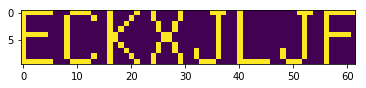

In [49]:
visualise(pos)